# Import libraries

In [150]:
import os
import pandas as pd
from pandas.plotting import autocorrelation_plot
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM, SVR
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

# Merging Spreatsheets by year

In [91]:
cwd = os.chdir("/Dataset")
files = os.listdir(cwd)

df_2014 = pd.DataFrame()
df_2015 = pd.DataFrame()
df_2016 = pd.DataFrame()
df_2017 = pd.DataFrame()
df_2018 = pd.DataFrame()

# Merging the files for the year: 2014
for f in files:
    if f.endswith(".xls") and "2014" in f:
        df_2014 = df_2014.append(pd.read_excel(f, index_col = 'TRANS DATE', parse_dates = True))
        
# Merging the files for the year: 2015
for f in files:
    if f.endswith(".xls") and "2015" in f:
        df_2015 = df_2015.append(pd.read_excel(f, index_col = 'TRANS DATE', parse_dates = True))

# Merging the files for the year: 2016
for f in files:
    if f.endswith(".xls") and "2016" in f:
        df_2016 = df_2016.append(pd.read_excel(f, index_col = 'TRANS DATE', parse_dates = True))
        
# Merging the files for the year: 2017
for f in files:
    if f.endswith(".xls") and "2017" in f:
        df_2017 = df_2017.append(pd.read_excel(f, index_col = 'TRANS DATE', parse_dates = True))
        
# Merging the files for the year: 2018
for f in files:
    if f.endswith(".xls") and "2018" in f:
        df_2018 = df_2018.append(pd.read_excel(f, index_col = 'TRANS DATE', parse_dates = True))
        

# Profiling / clustering
## Based on people's transactions

Text(0, 0.5, 'ORIGINAL GROSS AMT')

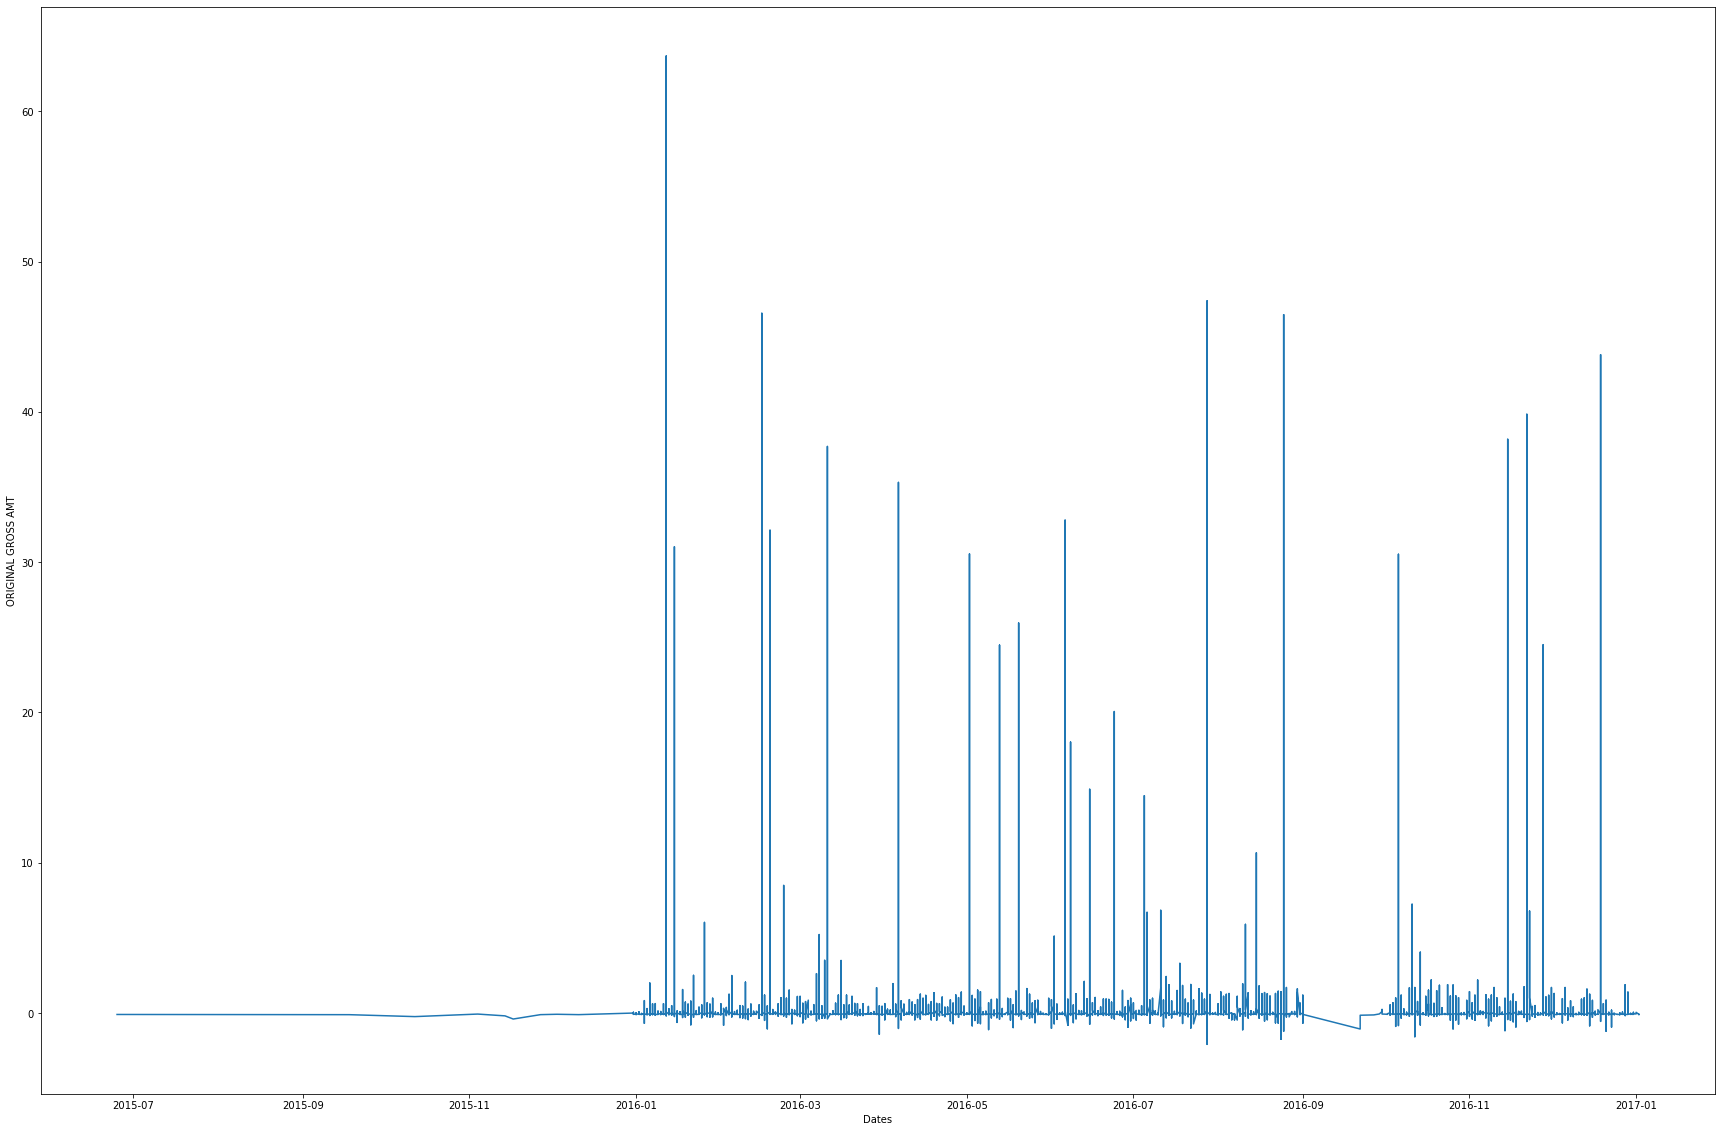

In [90]:
df_2016 = df_2016.drop('Directorates',axis=1)
df_2016 = df_2016.dropna()
df_2016 = df_2016.sort_values(by = 'TRANS DATE')
plt.figure(figsize=(30,20))
plt.plot(df['ORIGINAL GROSS AMT'])
plt.xlabel('Dates')
plt.ylabel('ORIGINAL GROSS AMT')

# Preprocessing

In [103]:
# # Dropping rows that contain NULL values from all DataFrames
df_2014 = df_2014.dropna()
df_2015 = df_2015.dropna()
df_2016 = df_2016.drop('Directorates',axis=1)
df_2016 = df_2016.dropna()
df_2017 = df_2017.dropna()
df_2018 = df_2018.dropna()

# # Standardizing the ORIGINAL GROSS AMT variable
df_2014_orig_gross_amt= pd.DataFrame(df_2014['ORIGINAL GROSS AMT'].values.reshape(-1, 1))
df_2015_orig_gross_amt= pd.DataFrame(df_2015['ORIGINAL GROSS AMT'].values.reshape(-1, 1))
df_2016_orig_gross_amt= pd.DataFrame(df_2016['ORIGINAL GROSS AMT'].values.reshape(-1, 1))
df_2017_orig_gross_amt= pd.DataFrame(df_2017['ORIGINAL GROSS AMT'].values.reshape(-1, 1))
df_2018_orig_gross_amt= pd.DataFrame(df_2018['ORIGINAL GROSS AMT'].values.reshape(-1, 1))

df_2014['ORIGINAL GROSS AMT'] = StandardScaler().fit_transform(df_2014_orig_gross_amt)
df_2015['ORIGINAL GROSS AMT'] = StandardScaler().fit_transform(df_2015_orig_gross_amt)
df_2016['ORIGINAL GROSS AMT'] = StandardScaler().fit_transform(df_2016_orig_gross_amt)
df_2017['ORIGINAL GROSS AMT'] = StandardScaler().fit_transform(df_2017_orig_gross_amt)
df_2018['ORIGINAL GROSS AMT'] = StandardScaler().fit_transform(df_2018_orig_gross_amt)

# # Standardizing the BILLING GROSS AMT variable 

df_2017['BILLING GROSS AMT'] = StandardScaler().fit_transform(df_2017['BILLING GROSS AMT'].values.reshape(-1, 1))
df_2018['BILLING GROSS AMT'] = StandardScaler().fit_transform(df_2018['BILLING GROSS AMT'].values.reshape(-1, 1))

# # Standardizing the TRANS TAX AMT variable
df_2017['TRANS TAX AMT'] = StandardScaler().fit_transform(df_2017['TRANS TAX AMT'].values.reshape(-1, 1))

# # Sorting values by date
df_2014 = df_2014.sort_values(by = 'TRANS DATE')
df_2015 = df_2015.sort_values(by = 'TRANS DATE')
df_2016 = df_2016.sort_values(by = 'TRANS DATE')
df_2017 = df_2017.sort_values(by = 'TRANS DATE')
df_2018 = df_2018.sort_values(by = 'TRANS DATE')

In [104]:
df = df_2016
df.head()

TRANS VAT DESC  ORIGINAL GROSS AMT       MERCHANT NAME  \
TRANS DATE                                                          
2015-06-25             VR           -0.099683  the consortium/wms   
2015-09-18             VZ           -0.113460       currys online   
2015-10-12             VR           -0.241841       currys online   
2015-11-04             VZ           -0.072931  paypal suziesvarie   
2015-11-14             VR           -0.192347   credit adjustment   

                 CARD NUMBER TRANS CAC CODE 1      TRANS CAC DESC 1  \
TRANS DATE                                                            
2015-06-25  ************6158             L080        Mat'l Raw/Drct   
2015-09-18  ************4193             J310    Other Fix&Fittings   
2015-10-12  ************0381             P150  Aftercare Assistance   
2015-11-04  ************7587             K020          Vehicle Fuel   
2015-11-14  ************0381             P150  Aftercare Assistance   

           TRANS CAC CODE 2             TRANS CAC DESC 2 TRANS CAC CODE 3  \
TRANS DATE                                                                  
2015-06-25            REABR            Bournville Junior              A00   
2015-09-18            REAMK        St Laurence CE Infant              A00   
2015-10-12            RV00G  16+ Accommodation & Support              A00   
2015-11-04            REAFA    Highfield Junior & Infant              A00   
2015-11-14            RV00G  16+ Accommodation & Support              A00   

              Directorate  
TRANS DATE                 
2015-06-25  CYP&F SCHOOLS  
2015-09-18  CYP&F SCHOOLS  
2015-10-12          CYP&F  
2015-11-04  CYP&F SCHOOLS  
2015-11-14          CYP&F

# Exploratory analysis

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43973 entries, 2015-06-25 to 2017-01-02
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TRANS VAT DESC      43973 non-null  object 
 1   ORIGINAL GROSS AMT  43973 non-null  float64
 2   MERCHANT NAME       43973 non-null  object 
 3   CARD NUMBER         43973 non-null  object 
 4   TRANS CAC CODE 1    43973 non-null  object 
 5   TRANS CAC DESC 1    43973 non-null  object 
 6   TRANS CAC CODE 2    43973 non-null  object 
 7   TRANS CAC DESC 2    43973 non-null  object 
 8   TRANS CAC CODE 3    43973 non-null  object 
 9   Directorate         43973 non-null  object 
dtypes: float64(1), object(9)
memory usage: 3.7+ MB


In [106]:
# Analyse the original gross amt variable;

df['ORIGINAL GROSS AMT'].describe()

count    4.397300e+04
mean     3.806458e-17
std      1.000011e+00
min     -2.089971e+00
25%     -9.050942e-02
50%     -7.204117e-02
75%     -3.994587e-02
max      6.367468e+01
Name: ORIGINAL GROSS AMT, dtype: float64

In [108]:
df['TRANS VAT DESC'].value_counts()

VR    22391
VZ    21454
VE       73
VS       38
VL       16
VT        1
Name: TRANS VAT DESC, dtype: int64

In [109]:
df['MERCHANT NAME'].value_counts()

amazon uk marketplace        5837
amazon uk retail             2182
travelodge website           1270
asda home shopping            858
amazon uk retail amazon.c     583
                             ... 
cambabest t/c 2                 1
paypal visualstres              1
secure safe ltd                 1
www.jfilters.com                1
www.tes.co.uk                   1
Name: MERCHANT NAME, Length: 5884, dtype: int64

In [110]:
df['TRANS CAC CODE 1'].value_counts()

L100    9303
K020    5473
L220    4685
MC70    2848
L030    2071
        ... 
M600       1
N040       1
N050       1
L800       1
L250       1
Name: TRANS CAC CODE 1, Length: 110, dtype: int64

In [111]:
df['TRANS CAC DESC 1'].value_counts()

Equip Operational       9303
Vehicle Fuel            5473
Purchases Food          4685
Supplies & Sev Mic      2848
Books                   2071
                        ... 
HRM CO Building            1
Phon Centrx Netwk          1
HEALTH AUTHORITIES         1
AMO - Lighting             1
Insurance NonPremise       1
Name: TRANS CAC DESC 1, Length: 110, dtype: int64

In [112]:
df['TRANS CAC CODE 2'].value_counts()

RUF0F    3135
REAAB    1180
RJADC     956
RLBMC     839
RV014     767
         ... 
RV0L0       1
RV0L6       1
RUBNJ       1
RHBN1       1
REH93       1
Name: TRANS CAC CODE 2, Length: 854, dtype: int64

In [113]:
df['TRANS CAC DESC 2'].value_counts()

Illegal Money Lending T Stds Comm Inv.    3135
The City of Birmingham School             1180
Homeless Private Sector Accom              956
Technical Unit                             839
Camborne House HLDC                        767
                                          ... 
Civil Litigation and PL Team                 1
Sheldon Library                              1
Housing Needs Furnished Accom                1
Ladywood Income                              1
Kings Norton Boys  (Exgm)                    1
Name: TRANS CAC DESC 2, Length: 849, dtype: int64

In [114]:
df['TRANS CAC CODE 3'].value_counts()

A00    43542
A5F      390
A46       35
A9Y        5
A8F        1
Name: TRANS CAC CODE 3, dtype: int64

In [115]:
df['Directorate'].value_counts()

CYP&F SCHOOLS           21338
Local Services           9021
CYP&F                    6131
Adult & Communities      3302
Corporate Resources      2947
DEVELOPMENT               791
CYP&F Schools             190
CYP&F                      96
CYP&F                      63
CYO&F                      49
Adults                     16
Local services             12
Adults & Comms              9
Adults & Communities        8
Name: Directorate, dtype: int64

Text(0, 0.5, 'ORIGINAL GROSS AMT')

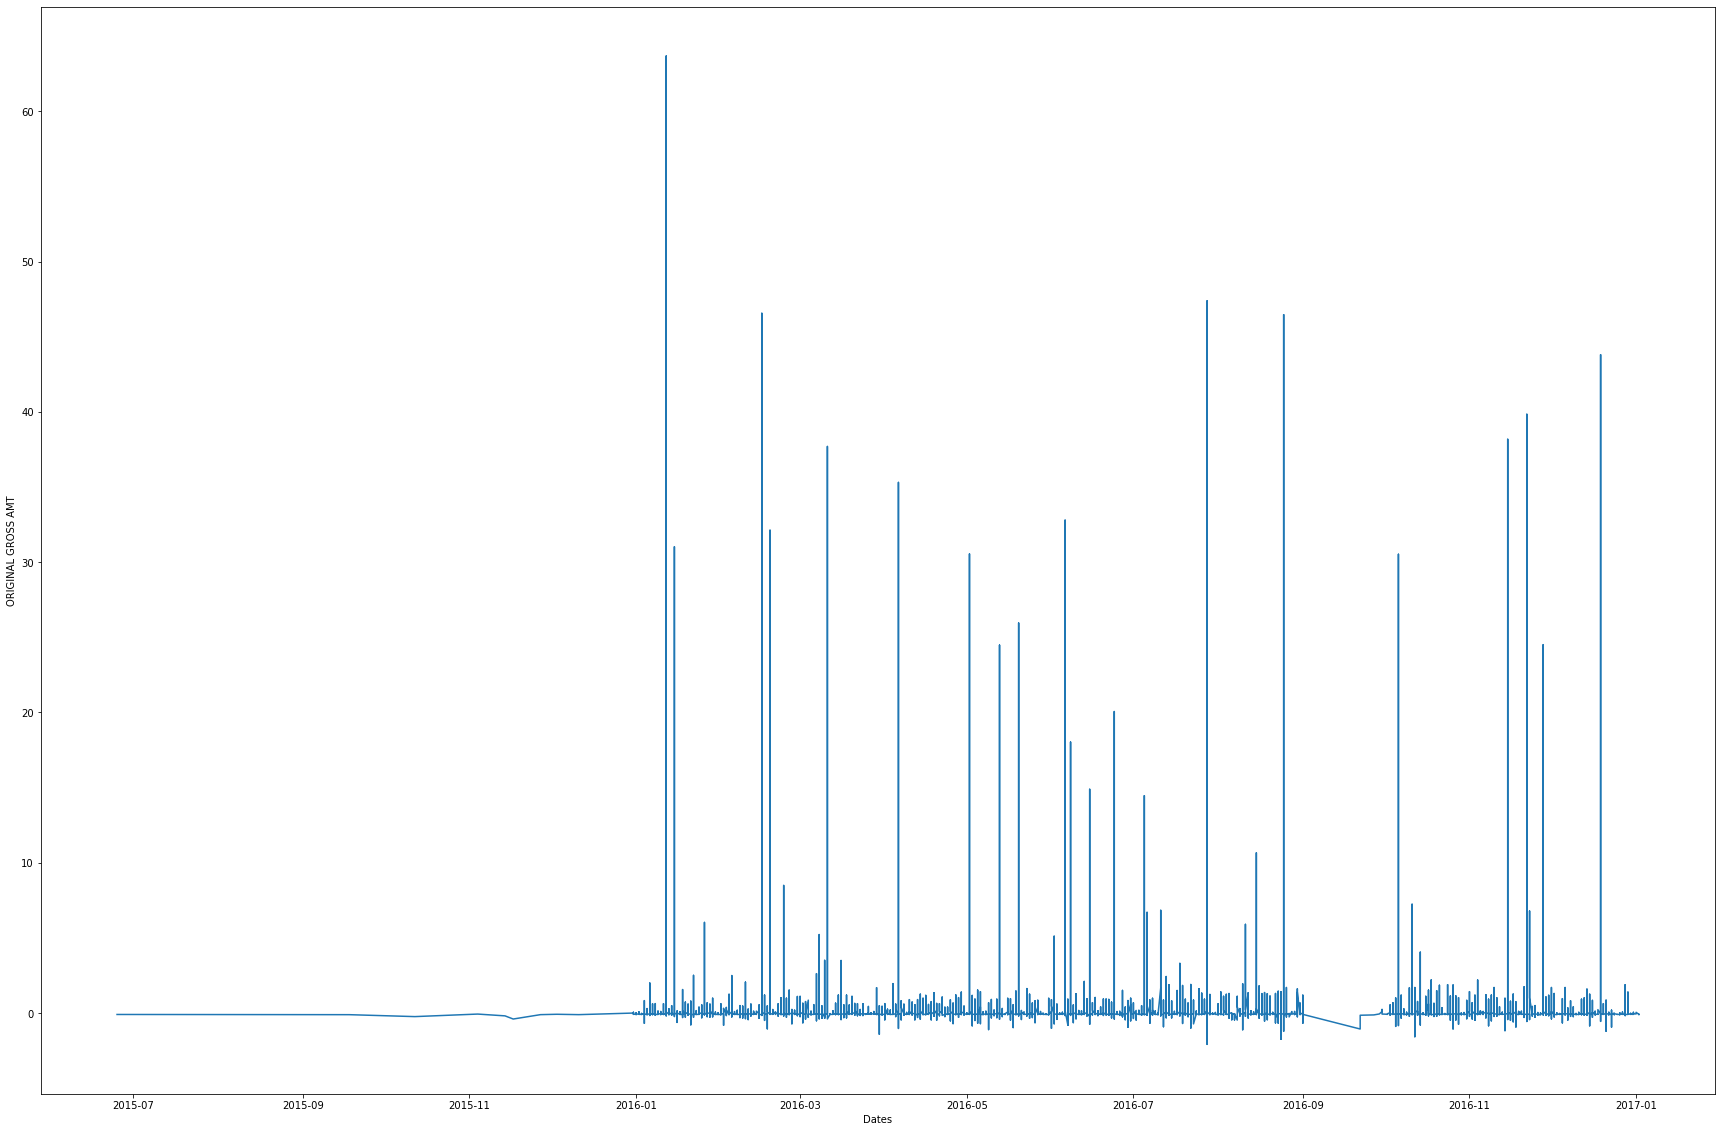

In [116]:
plt.figure(figsize=(30,20))
plt.plot(df['ORIGINAL GROSS AMT'])
plt.xlabel('Dates')
plt.ylabel('ORIGINAL GROSS AMT')

Text(0, 0.5, 'Cluster inertia')

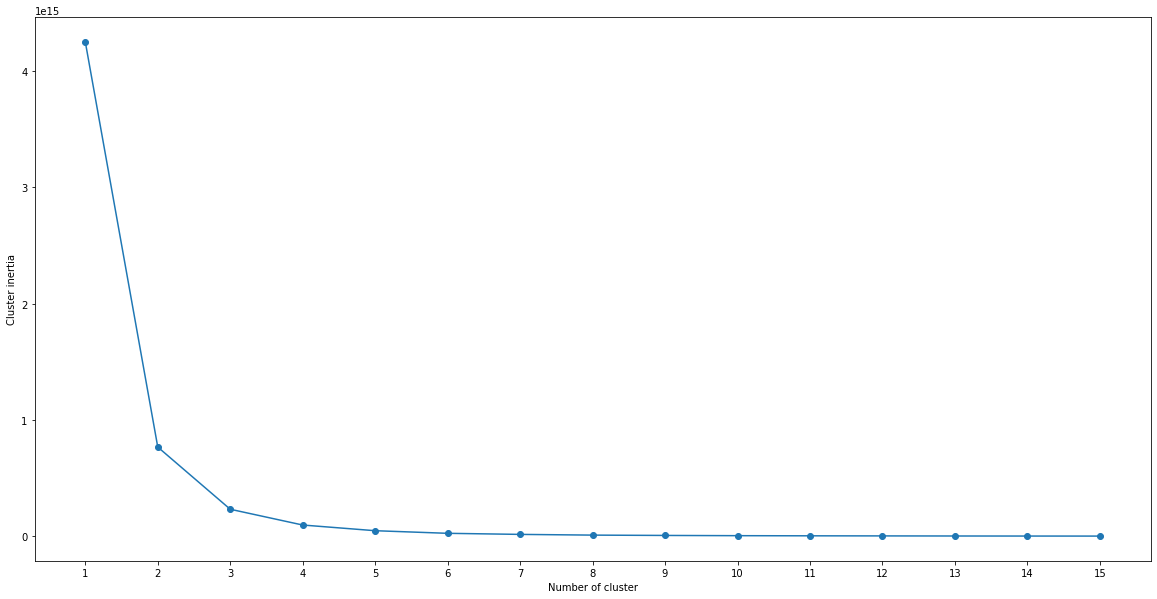

In [117]:
### Here we will do clustering using the KMeans algorithms
# Scaling the frequency of transactions by means amount of transactions
card_tr = card_data.values

# First we need to determine the optimal number of clusters
cluster_range = range(1,16)
cluster_error = []

for num in cluster_range:
    model = KMeans(num)
    model.fit(card_tr)
    cluster_error.append(model.inertia_)

df_clust = pd.DataFrame({'cluster_number':cluster_range,'cluster_error':cluster_error})


plt.figure(figsize=(20,10))
plt.xticks(range(1,16))
plt.plot(df_clust.cluster_number,df_clust.cluster_error, marker="o")
plt.xlabel("Number of cluster")
plt.ylabel("Cluster inertia")

Text(0, 0.5, 'The average transactions made by each person')

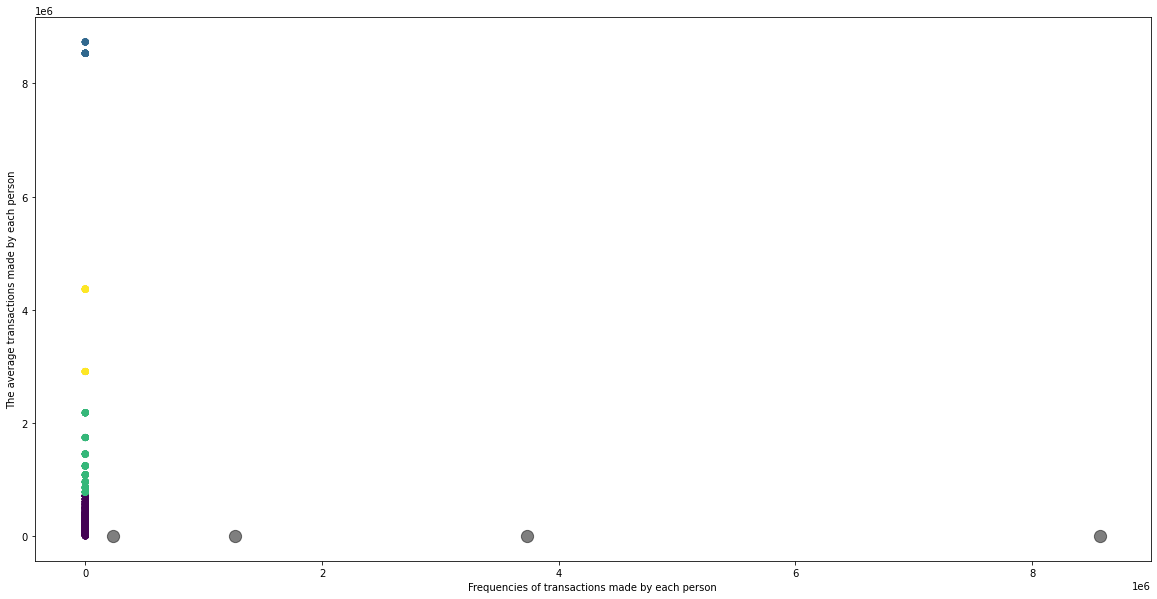

In [118]:
# The elbow graph showed us that 4 clusters is the optimal number
# so we'll start implementing the code

kmeans_model = KMeans(n_clusters=4)
kmeans_model.fit(card_tr)
kmeans_predict = kmeans_model.predict(card_tr)
kmeans_centroids = kmeans_model.cluster_centers_

plt.figure(figsize=(20,10))
plt.scatter(card_tr[:,1],card_tr[:,0], c=kmeans_predict)
plt.scatter(kmeans_centroids[:,0], kmeans_centroids[:,1], c='black', s=150, alpha=0.5)
plt.xlabel('Frequencies of transactions made by each person')
plt.ylabel('The average transactions made by each person')

## Based on merchants

In [ ]:
### Converting categorical variables about cards into numerical ones

# Frequency of transactions made by each unique card
card_vc = df['CARD NUMBER'].value_counts()

# Transforming it into a DataFrame
card_vc = pd.DataFrame(card_vc)
card_vc = card_vc.reset_index()
card_vc.columns = ['unique_card','counts']

sum_tr = 0
card_trans = pd.DataFrame()
j = 0

# Average amount of transactions by each unique card
for m in card_vc['unique_card']:
    for i in range(len(df['CARD NUMBER'])):
        if df['CARD NUMBER'][i] == m:
            sum_tr += df['ORIGINAL GROSS AMT'][i]
    card_trans = card_trans.append([(sum_tr/card_vc['counts'][j])])
    j += 1

# Assembling previous data
card_data = pd.DataFrame()
card_data['card_name'] = card_vc['unique_card']
card_data['trans_avg'] = card_trans.values.reshape(-1,1)
card_data['frequency'] = card_vc['counts']

card_data = card_data.set_index(card_data.card_name)
card_data = card_data.drop(['card_name'], axis = 1)

card_data

In [ ]:
# Frequency of transactions made by each unique card
card_vc = df['CARD NUMBER'].value_counts()

# Transforming it into a DataFrame
card_vc = pd.DataFrame(card_vc)
card_vc = card_vc.reset_index()
card_vc.columns = ['unique_card','counts']

sum_tr = 0
card_trans = pd.DataFrame()
j = 0

# Average amount of transactions by each unique card
for m in card_vc['unique_card']:
    for i in range(len(df['CARD NUMBER'])):
        if df['CARD NUMBER'][i] == m:
            sum_tr += df['ORIGINAL GROSS AMT'][i]
    card_trans = card_trans.append([(sum_tr/card_vc['counts'][j])])
    j += 1

# Assembling previous data
card_data = pd.DataFrame()
card_data['card_name'] = card_vc['unique_card']
card_data['trans_avg'] = card_trans.values.reshape(-1,1)
card_data['frequency'] = card_vc['counts']

card_data = card_data.set_index(card_data.card_name)
card_data = card_data.drop(['card_name'], axis = 1)

card_data

In [119]:
# Frequency of transactions made in favor of ech unique merchant
merchant_vc = df['MERCHANT NAME'].value_counts()

# Transforming it into a DataFrame
merchant = pd.DataFrame(merchant_vc)
merchant = merchant.reset_index()
merchant.columns = ['unique_merchant','counts']

sum_tr = 0
merchant_trans = pd.DataFrame()
j = 0

# Average amount of transactions for each unique merchant
for m in merchant['unique_merchant']:
    for i in range(len(df['MERCHANT NAME'])):
        if df['MERCHANT NAME'][i] == m:
            sum_tr += df['ORIGINAL GROSS AMT'][i]
    merchant_trans = merchant_trans.append([(sum_tr/merchant['counts'][j])])
    j += 1

# Assembling previous data
merchant_data = pd.DataFrame()
merchant_data['merchant_name'] = merchant['unique_merchant']
merchant_data['trans_avg'] = merchant_trans.values.reshape(-1,1)
merchant_data['frequency'] = merchant['counts']

merchant_data = merchant_data.set_index(merchant_data.merchant_name)
merchant_data = merchant_data.drop(['merchant_name'], axis = 1)

merchant_data

trans_avg  frequency
merchant_name                                     
amazon uk marketplace     -7.646016e-02       5837
amazon uk retail          -2.717117e-01       2182
travelodge website        -2.275435e-01       1270
asda home shopping        -3.933832e-01        858
amazon uk retail amazon.c -6.490717e-01        583
...                                 ...        ...
cambabest t/c 2           -1.353211e-01          1
paypal visualstres        -2.283408e-01          1
secure safe ltd            8.744175e-03          1
www.jfilters.com           9.195102e-02          1
www.tes.co.uk             -3.866102e-12          1

[5884 rows x 2 columns]

Text(0, 0.5, 'Average transactions')

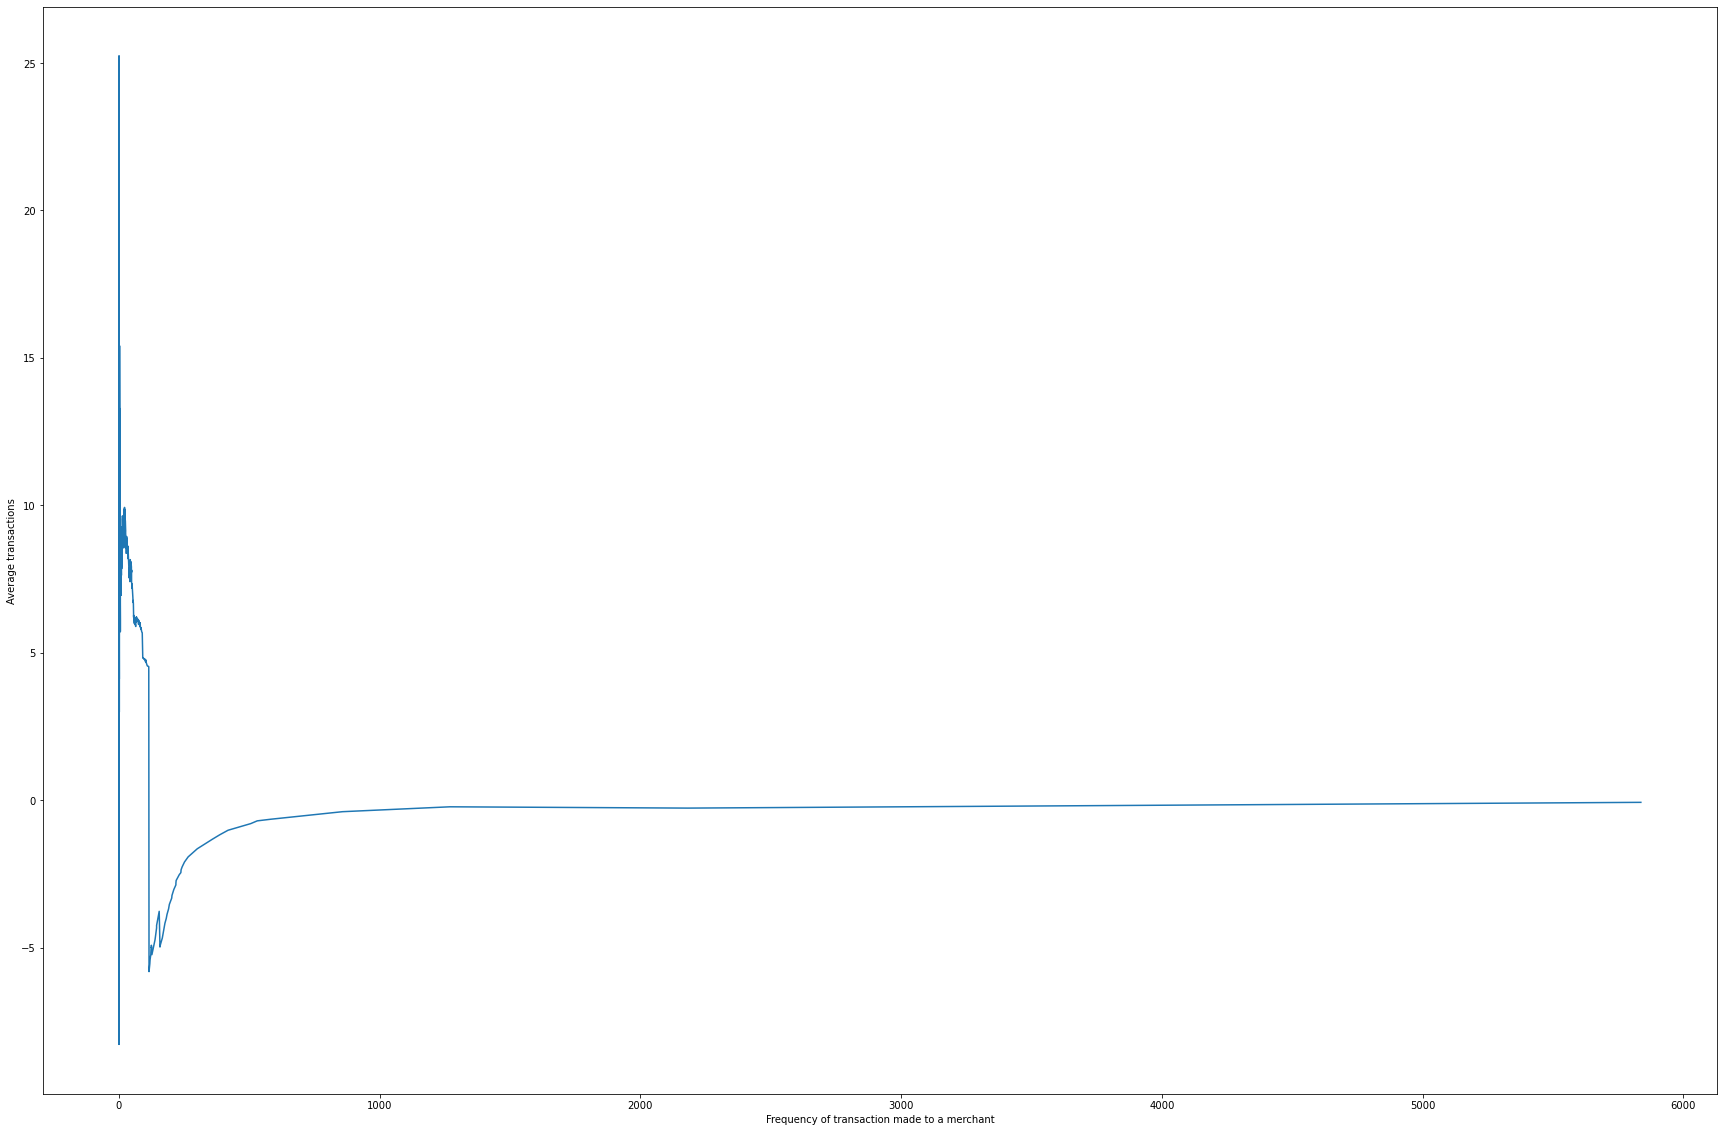

In [120]:
plt.figure(figsize=(30,20))
plt.plot(merchant_data.frequency,merchant_data.trans_avg)
plt.xlabel("Frequency of transaction made to a merchant")
plt.ylabel("Average transactions")

In [121]:
# The average number of merchants that receive negative average transactions
negative = 0
for i in range(len(merchant_data)):
    if merchant_data.trans_avg[i]<0:
        negative += 1
        
negativ_avg = negative/len(merchant_data)

negativ_avg

0.13494221617946975

Text(0, 0.5, 'Cluster inertia')

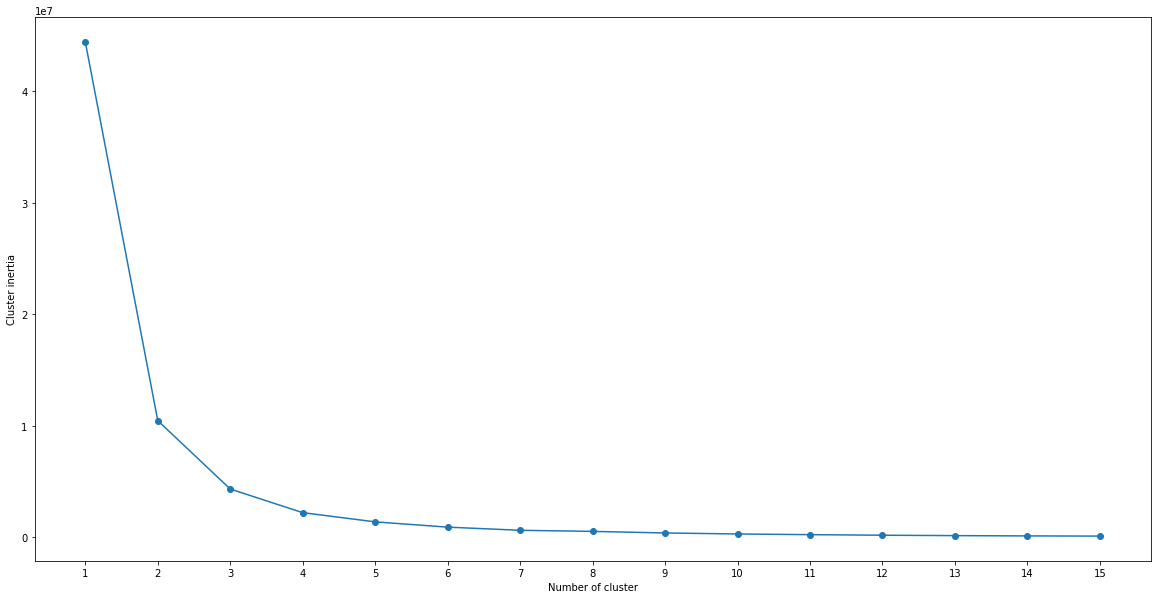

In [122]:
### Here we will do clustering using the KMeans algorithms
# Scaling the frequency of transactions by means amount of transactions
merchant_tr = merchant_data.values

# First we need to determine the optimal number of clusters
cluster_range = range(1,16)
cluster_error = []

for num in cluster_range:
    model = KMeans(num)
    model.fit(merchant_tr)
    cluster_error.append(model.inertia_)

df_clust = pd.DataFrame({'cluster_number':cluster_range,'cluster_error':cluster_error})


plt.figure(figsize=(20,10))
plt.xticks(range(1,16))
plt.plot(df_clust.cluster_number,df_clust.cluster_error, marker="o")
plt.xlabel("Number of cluster")
plt.ylabel("Cluster inertia")

Text(0, 0.5, 'The average transaction made by each person')

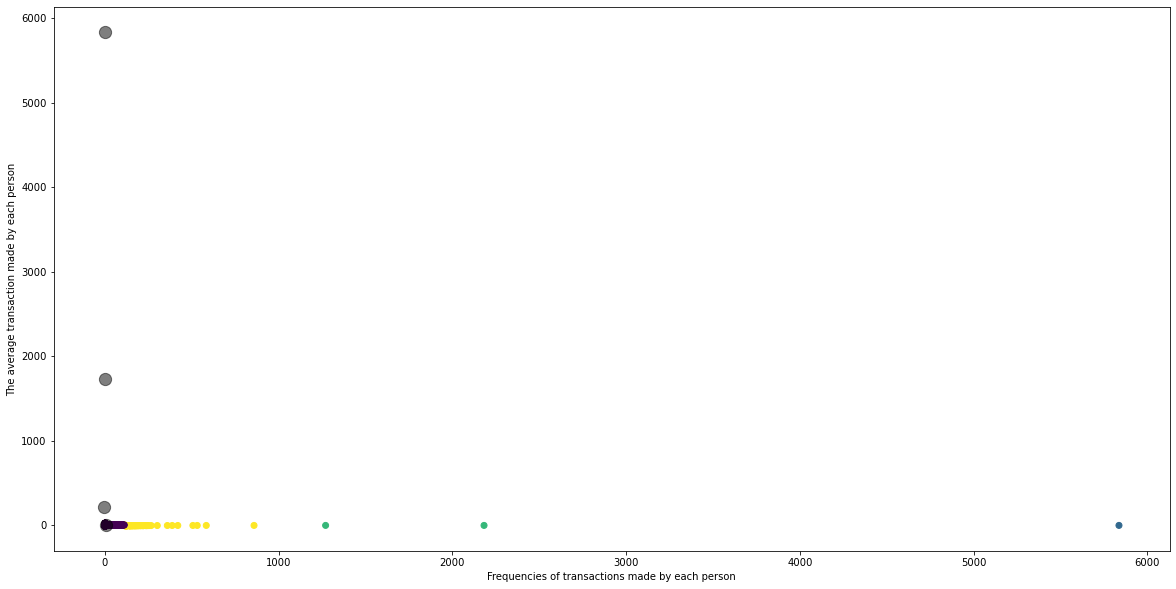

In [123]:
# The elbow graph showed us that 4 clusters is the optimal number
# so we'll start implementing the code

kmeans_model = KMeans(n_clusters=4)
kmeans_model.fit(merchant_tr)
kmeans_predict = kmeans_model.predict(merchant_tr)
kmeans_centroids = kmeans_model.cluster_centers_

plt.figure(figsize=(20,10))
plt.scatter(merchant_tr[:,1],merchant_tr[:,0], c=kmeans_predict)
plt.scatter(kmeans_centroids[:,0], kmeans_centroids[:,1], c='black', s=150, alpha=0.5)
plt.xlabel('Frequencies of transactions made by each person')
plt.ylabel('The average transaction made by each person')

## One-Class SVM

In [124]:
# Splitting the ORIGINAL GROSS AMOUNT time series data into training and testing datasets (70%+30%)

train_set = df.iloc[0:int(len(df)*0.7),1]
test_set = df.iloc[int(len(df)*0.7)+1:len(df),1]

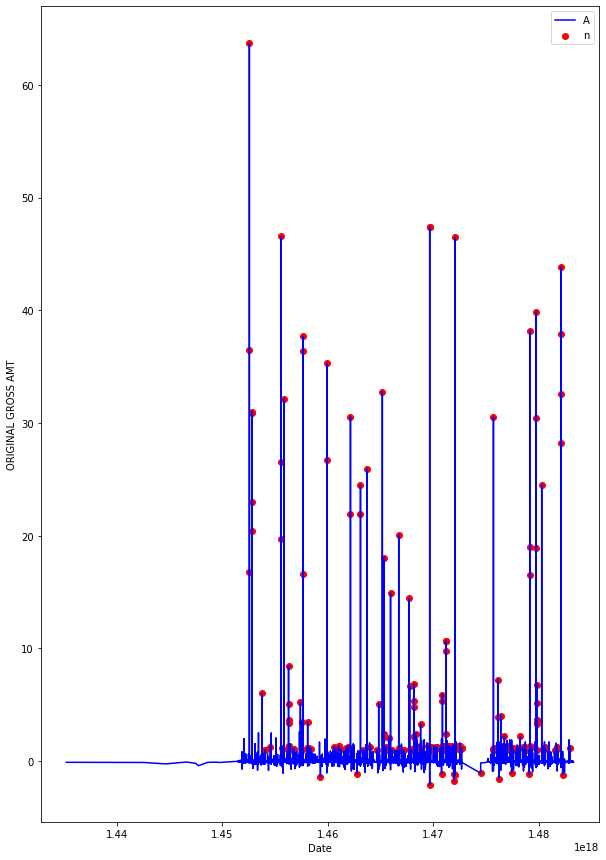

In [125]:
# Training the One-Class SVM model 

ocsvm_model = OneClassSVM(gamma ="auto",nu=0.0025).fit(df['ORIGINAL GROSS AMT'].values.reshape(-1,1))
ocsvm_model.predict(df['ORIGINAL GROSS AMT'].values.reshape(-1,1))
ocsvm_decision_func = ocsvm_model.decision_function(df['ORIGINAL GROSS AMT'].values.reshape(-1,1))
ocsvm_score = ocsvm_model.score_samples(df['ORIGINAL GROSS AMT'].values.reshape(-1,1))

df['INT_TIME'] = df.index.astype(np.int64)
df['ocsvm_decis_func'] = ocsvm_decision_func
anomaly = df.loc[df['ocsvm_decis_func']<0, ['INT_TIME','ORIGINAL GROSS AMT']]
normal = df.loc[df['ocsvm_decis_func']>=0, ['INT_TIME','ORIGINAL GROSS AMT']]

fig, ax = plt.subplots(figsize=(10,15))
ax.plot(df['INT_TIME'],df['ORIGINAL GROSS AMT'], color='blue',label='Normal')
ax.scatter(anomaly['INT_TIME'],anomaly['ORIGINAL GROSS AMT'], color='red', label='Anomaly')

plt.xlabel('Date')
plt.ylabel('ORIGINAL GROSS AMT')
plt.legend('Anomaly detection using OCSVM')
plt.show()

In [126]:
anomaly_fraction = len(anomaly)/len(df['ORIGINAL GROSS AMT'])
anomaly_fraction

0.00543515338957997

# Forecasting future transactional behavior

In [127]:
# splitting training set and test test ona 70%:30% basis from the normal dataset extracted from oncsvm anomaly detection
normal_original_gross_amt = normal['ORIGINAL GROSS AMT']

train_set = normal.iloc[0:int(len(normal)*0.7),1]
train_set.index = pd.DatetimeIndex(train_set.index).to_period('D')
test_set = normal.iloc[int(len(normal)*0.7)+1:len(normal),1]
test_set.index = pd.DatetimeIndex(test_set.index).to_period('D')

predicted=-0.099683, expected=-0.113460
predicted=-0.113460, expected=-0.241841
predicted=-0.241841, expected=-0.072931
predicted=-0.072931, expected=-0.192347
predicted=-0.192347, expected=-0.402741
predicted=-0.402741, expected=-0.110986
predicted=-0.110986, expected=-0.086579
predicted=-0.086579, expected=-0.106138
predicted=-0.106138, expected=-0.111158
predicted=-0.111158, expected=-0.111158
predicted=-0.111158, expected=-0.005900
predicted=-0.005900, expected=0.013006
predicted=0.013006, expected=-0.070427
predicted=-0.070427, expected=-0.094705
predicted=-0.094705, expected=0.049921
predicted=0.049921, expected=-0.080648
predicted=-0.080648, expected=-0.090294
predicted=-0.090294, expected=0.018973
predicted=0.018973, expected=-0.094727
predicted=-0.094727, expected=-0.063973
predicted=-0.063973, expected=-0.064675
predicted=-0.064675, expected=-0.095530
predicted=-0.095530, expected=-0.093428
predicted=-0.093428, expected=-0.094856
predicted=-0.094856, expected=-0.091155
predic

predicted=-0.037794, expected=-0.099683
predicted=-0.099683, expected=-0.101626
predicted=-0.101626, expected=-0.052146
predicted=-0.052146, expected=-0.028987
predicted=-0.028987, expected=-0.065063
predicted=-0.065063, expected=-0.058852
predicted=-0.058852, expected=0.141143
predicted=0.141143, expected=-0.085819
predicted=-0.085819, expected=-0.027811
predicted=-0.027811, expected=-0.076617
predicted=-0.076617, expected=0.480249
predicted=0.480249, expected=-0.089577
predicted=-0.089577, expected=-0.094849
predicted=-0.094849, expected=-0.078604
predicted=-0.078604, expected=-0.069595
predicted=-0.069595, expected=0.153028
predicted=0.153028, expected=0.590571
predicted=0.590571, expected=-0.064367
predicted=-0.064367, expected=0.005239
predicted=0.005239, expected=0.005239
predicted=0.005239, expected=0.005239
predicted=0.005239, expected=0.005239
predicted=0.005239, expected=0.081364
predicted=0.081364, expected=0.078423
predicted=0.078423, expected=-0.086694
predicted=-0.086694,

predicted=-0.093959, expected=-0.095530
predicted=-0.095530, expected=-0.097904
predicted=-0.097904, expected=-0.057460
predicted=-0.057460, expected=0.012769
predicted=0.012769, expected=-0.021657
predicted=-0.021657, expected=-0.032458
predicted=-0.032458, expected=-0.096254
predicted=-0.096254, expected=-0.093945
predicted=-0.093945, expected=-0.069294
predicted=-0.069294, expected=0.023355
predicted=0.023355, expected=-0.082627
predicted=-0.082627, expected=-0.097050
predicted=-0.097050, expected=-0.089003
predicted=-0.089003, expected=-0.048911
predicted=-0.048911, expected=-0.048983
predicted=-0.048983, expected=-0.100292
predicted=-0.100292, expected=-0.083882
predicted=-0.083882, expected=-0.075419
predicted=-0.075419, expected=-0.092833
predicted=-0.092833, expected=-0.090517
predicted=-0.090517, expected=-0.068993
predicted=-0.068993, expected=-0.065407
predicted=-0.065407, expected=-0.110706
predicted=-0.110706, expected=-0.096964
predicted=-0.096964, expected=-0.084714
pred

predicted=-0.097151, expected=-0.066554
predicted=-0.066554, expected=0.008466
predicted=0.008466, expected=0.120387
predicted=0.120387, expected=-0.094167
predicted=-0.094167, expected=-0.095544
predicted=-0.095544, expected=-0.046186
predicted=-0.046186, expected=-0.095960
predicted=-0.095960, expected=-0.027459
predicted=-0.027459, expected=-0.092245
predicted=-0.092245, expected=0.008825
predicted=0.008825, expected=-0.064711
predicted=-0.064711, expected=-0.091944
predicted=-0.091944, expected=-0.096161
predicted=-0.096161, expected=0.261614
predicted=0.261614, expected=0.005239
predicted=0.005239, expected=-0.005950
predicted=-0.005950, expected=-0.060343
predicted=-0.060343, expected=0.067636
predicted=0.067636, expected=-0.060429
predicted=-0.060429, expected=0.083766
predicted=0.083766, expected=0.041171
predicted=0.041171, expected=-0.146309
predicted=-0.146309, expected=-0.054355
predicted=-0.054355, expected=-0.092769
predicted=-0.092769, expected=0.108446
predicted=0.10844

predicted=-0.088358, expected=-0.087390
predicted=-0.087390, expected=-0.096032
predicted=-0.096032, expected=-0.096785
predicted=-0.096785, expected=-0.084592
predicted=-0.084592, expected=-0.092310
predicted=-0.092310, expected=-0.090868
predicted=-0.090868, expected=0.044456
predicted=0.044456, expected=-0.086945
predicted=-0.086945, expected=0.000577
predicted=0.000577, expected=-0.075570
predicted=-0.075570, expected=-0.059777
predicted=-0.059777, expected=0.036437
predicted=0.036437, expected=-0.097108
predicted=-0.097108, expected=0.006946
predicted=0.006946, expected=-0.091227
predicted=-0.091227, expected=-0.034710
predicted=-0.034710, expected=-0.094598
predicted=-0.094598, expected=-0.086436
predicted=-0.086436, expected=-0.005885
predicted=-0.005885, expected=-0.094382
predicted=-0.094382, expected=-0.069287
predicted=-0.069287, expected=-0.069689
predicted=-0.069689, expected=-0.082591
predicted=-0.082591, expected=-0.073762
predicted=-0.073762, expected=-0.092668
predicte

predicted=-0.065056, expected=-0.064130
predicted=-0.064130, expected=0.083773
predicted=0.083773, expected=-0.093378
predicted=-0.093378, expected=0.034271
predicted=0.034271, expected=-0.057281
predicted=-0.057281, expected=-0.070886
predicted=-0.070886, expected=-0.079837
predicted=-0.079837, expected=0.032084
predicted=0.032084, expected=-0.038390
predicted=-0.038390, expected=-0.049033
predicted=-0.049033, expected=-0.094813
predicted=-0.094813, expected=0.023047
predicted=0.023047, expected=-0.091951
predicted=-0.091951, expected=-0.085274
predicted=-0.085274, expected=-0.026634
predicted=-0.026634, expected=-0.089075
predicted=-0.089075, expected=-0.092668
predicted=-0.092668, expected=-0.011616
predicted=-0.011616, expected=-0.054534
predicted=-0.054534, expected=-0.073067
predicted=-0.073067, expected=-0.054914
predicted=-0.054914, expected=-0.099181
predicted=-0.099181, expected=0.021376
predicted=0.021376, expected=-0.036747
predicted=-0.036747, expected=-0.078324
predicted=

predicted=0.620428, expected=-0.095530
predicted=-0.095530, expected=0.081622
predicted=0.081622, expected=-0.029403
predicted=-0.029403, expected=-0.091234
predicted=-0.091234, expected=-0.048961
predicted=-0.048961, expected=-0.078338
predicted=-0.078338, expected=0.154778
predicted=0.154778, expected=-0.074014
predicted=-0.074014, expected=-0.074014
predicted=-0.074014, expected=-0.074014
predicted=-0.074014, expected=-0.056119
predicted=-0.056119, expected=-0.038762
predicted=-0.038762, expected=-0.103104
predicted=-0.103104, expected=-0.094884
predicted=-0.094884, expected=-0.072220
predicted=-0.072220, expected=-0.097753
predicted=-0.097753, expected=-0.004444
predicted=-0.004444, expected=-0.054728
predicted=-0.054728, expected=-0.053322
predicted=-0.053322, expected=-0.061771
predicted=-0.061771, expected=-0.037163
predicted=-0.037163, expected=-0.087655
predicted=-0.087655, expected=-0.081186
predicted=-0.081186, expected=-0.098399
predicted=-0.098399, expected=-0.074021
predi

predicted=-0.094813, expected=0.448584
predicted=0.448584, expected=0.106559
predicted=0.106559, expected=-0.095537
predicted=-0.095537, expected=-0.086314
predicted=-0.086314, expected=-0.067401
predicted=-0.067401, expected=0.063691
predicted=0.063691, expected=0.005239
predicted=0.005239, expected=-0.089068
predicted=-0.089068, expected=-0.095250
predicted=-0.095250, expected=-0.094368
predicted=-0.094368, expected=-0.056829
predicted=-0.056829, expected=0.005239
predicted=0.005239, expected=-0.071883
predicted=-0.071883, expected=-0.092661
predicted=-0.092661, expected=-0.057876
predicted=-0.057876, expected=-0.086536
predicted=-0.086536, expected=-0.063700
predicted=-0.063700, expected=-0.090509
predicted=-0.090509, expected=-0.051723
predicted=-0.051723, expected=-0.090509
predicted=-0.090509, expected=-0.070069
predicted=-0.070069, expected=-0.088358
predicted=-0.088358, expected=-0.079299
predicted=-0.079299, expected=-0.091944
predicted=-0.091944, expected=-0.084485
predicted=

predicted=0.249701, expected=0.233779
predicted=0.233779, expected=-0.059612
predicted=-0.059612, expected=-0.055646
predicted=-0.055646, expected=-0.087296
predicted=-0.087296, expected=0.007032
predicted=0.007032, expected=-0.074587
predicted=-0.074587, expected=-0.096276
predicted=-0.096276, expected=-0.124548
predicted=-0.124548, expected=-0.084062
predicted=-0.084062, expected=-0.084829
predicted=-0.084829, expected=0.148861
predicted=0.148861, expected=-0.161836
predicted=-0.161836, expected=-0.000141
predicted=-0.000141, expected=-0.094920
predicted=-0.094920, expected=-0.087856
predicted=-0.087856, expected=-0.091800
predicted=-0.091800, expected=-0.051780
predicted=-0.051780, expected=0.021075
predicted=0.021075, expected=-0.048918
predicted=-0.048918, expected=-0.079751
predicted=-0.079751, expected=-0.095243
predicted=-0.095243, expected=-0.064690
predicted=-0.064690, expected=-0.013502
predicted=-0.013502, expected=-0.088358
predicted=-0.088358, expected=-0.070255
predicted

predicted=-0.092661, expected=0.017790
predicted=0.017790, expected=-0.097617
predicted=-0.097617, expected=-0.087325
predicted=-0.087325, expected=-0.085862
predicted=-0.085862, expected=0.022810
predicted=0.022810, expected=-0.071159
predicted=-0.071159, expected=-0.096391
predicted=-0.096391, expected=0.024962
predicted=0.024962, expected=-0.092302
predicted=-0.092302, expected=-0.057510
predicted=-0.057510, expected=-0.098184
predicted=-0.098184, expected=0.038675
predicted=0.038675, expected=0.376117
predicted=0.376117, expected=-0.056800
predicted=-0.056800, expected=-0.025960
predicted=-0.025960, expected=-0.038870
predicted=-0.038870, expected=-0.061111
predicted=-0.061111, expected=-0.086299
predicted=-0.086299, expected=-0.098184
predicted=-0.098184, expected=0.033884
predicted=0.033884, expected=-0.090739
predicted=-0.090739, expected=-0.043941
predicted=-0.043941, expected=-0.087468
predicted=-0.087468, expected=-0.090079
predicted=-0.090079, expected=-0.095688
predicted=-0

predicted=-0.091521, expected=-0.076208
predicted=-0.076208, expected=0.216444
predicted=0.216444, expected=0.022050
predicted=0.022050, expected=-0.068118
predicted=-0.068118, expected=-0.141432
predicted=-0.141432, expected=-0.027717
predicted=-0.027717, expected=-0.093565
predicted=-0.093565, expected=-0.090933
predicted=-0.090933, expected=0.029258
predicted=0.029258, expected=-0.069280
predicted=-0.069280, expected=-0.083359
predicted=-0.083359, expected=-0.079378
predicted=-0.079378, expected=-0.024827
predicted=-0.024827, expected=-0.693148
predicted=-0.693148, expected=-0.693148
predicted=-0.693148, expected=-0.090897
predicted=-0.090897, expected=-0.096097
predicted=-0.096097, expected=0.029982
predicted=0.029982, expected=-0.092661
predicted=-0.092661, expected=0.002226
predicted=0.002226, expected=-0.078489
predicted=-0.078489, expected=-0.091227
predicted=-0.091227, expected=-0.092475
predicted=-0.092475, expected=-0.914552
predicted=-0.914552, expected=-0.089599
predicted=

predicted=-0.067379, expected=-0.057123
predicted=-0.057123, expected=-0.020940
predicted=-0.020940, expected=0.161232
predicted=0.161232, expected=-0.049442
predicted=-0.049442, expected=-0.093966
predicted=-0.093966, expected=-0.099833
predicted=-0.099833, expected=-0.088358
predicted=-0.088358, expected=-0.088358
predicted=-0.088358, expected=-0.017174
predicted=-0.017174, expected=-0.063227
predicted=-0.063227, expected=-0.001001
predicted=-0.001001, expected=-0.079895
predicted=-0.079895, expected=0.295810
predicted=0.295810, expected=-0.096283
predicted=-0.096283, expected=-0.068304
predicted=-0.068304, expected=-0.043869
predicted=-0.043869, expected=-0.095989
predicted=-0.095989, expected=-0.092855
predicted=-0.092855, expected=-0.083122
predicted=-0.083122, expected=-0.098406
predicted=-0.098406, expected=-0.018896
predicted=-0.018896, expected=-0.051794
predicted=-0.051794, expected=-0.089089
predicted=-0.089089, expected=-0.085080
predicted=-0.085080, expected=-0.068168
pred

predicted=-0.072974, expected=-0.097359
predicted=-0.097359, expected=-0.060100
predicted=-0.060100, expected=-0.080755
predicted=-0.080755, expected=-0.090509
predicted=-0.090509, expected=-0.020230
predicted=-0.020230, expected=-0.094619
predicted=-0.094619, expected=-0.080483
predicted=-0.080483, expected=0.180597
predicted=0.180597, expected=-0.097861
predicted=-0.097861, expected=-0.098298
predicted=-0.098298, expected=-0.047491
predicted=-0.047491, expected=-0.097639
predicted=-0.097639, expected=-0.037866
predicted=-0.037866, expected=-0.084750
predicted=-0.084750, expected=-0.096964
predicted=-0.096964, expected=-0.083029
predicted=-0.083029, expected=-0.074802
predicted=-0.074802, expected=-0.036252
predicted=-0.036252, expected=0.058664
predicted=0.058664, expected=-0.093393
predicted=-0.093393, expected=-0.089362
predicted=-0.089362, expected=-0.094698
predicted=-0.094698, expected=-0.050582
predicted=-0.050582, expected=0.029982
predicted=0.029982, expected=-0.070657
predic

predicted=-0.067078, expected=-0.030938
predicted=-0.030938, expected=-0.054720
predicted=-0.054720, expected=-0.077607
predicted=-0.077607, expected=-0.049442
predicted=-0.049442, expected=-0.031160
predicted=-0.031160, expected=-0.056463
predicted=-0.056463, expected=-0.083337
predicted=-0.083337, expected=-0.051794
predicted=-0.051794, expected=-0.070621
predicted=-0.070621, expected=-0.090653
predicted=-0.090653, expected=-0.095530
predicted=-0.095530, expected=-0.097968
predicted=-0.097968, expected=-0.020294
predicted=-0.020294, expected=-0.080497
predicted=-0.080497, expected=-0.093385
predicted=-0.093385, expected=0.349860
predicted=0.349860, expected=-0.027395
predicted=-0.027395, expected=-0.027395
predicted=-0.027395, expected=-0.028083
predicted=-0.028083, expected=-0.027395
predicted=-0.027395, expected=-0.089233
predicted=-0.089233, expected=0.161892
predicted=0.161892, expected=-0.059260
predicted=-0.059260, expected=-0.026857
predicted=-0.026857, expected=0.025765
predi

predicted=-0.074817, expected=-0.089075
predicted=-0.089075, expected=-0.094985
predicted=-0.094985, expected=-0.042600
predicted=-0.042600, expected=-0.063169
predicted=-0.063169, expected=-0.048337
predicted=-0.048337, expected=-0.038153
predicted=-0.038153, expected=-0.089254
predicted=-0.089254, expected=-0.040304
predicted=-0.040304, expected=0.080116
predicted=0.080116, expected=-0.080834
predicted=-0.080834, expected=-0.039587
predicted=-0.039587, expected=-0.096964
predicted=-0.096964, expected=-0.096964
predicted=-0.096964, expected=-0.069194
predicted=-0.069194, expected=-0.096964
predicted=-0.096964, expected=-0.096964
predicted=-0.096964, expected=-0.094382
predicted=-0.094382, expected=-0.056980
predicted=-0.056980, expected=-0.095544
predicted=-0.095544, expected=-0.096964
predicted=-0.096964, expected=-0.052497
predicted=-0.052497, expected=-0.084808
predicted=-0.084808, expected=-0.096613
predicted=-0.096613, expected=-0.093916
predicted=-0.093916, expected=-0.042026
pr

predicted=-0.096620, expected=-0.094598
predicted=-0.094598, expected=-0.096434
predicted=-0.096434, expected=-0.083474
predicted=-0.083474, expected=0.023915
predicted=0.023915, expected=-0.082634
predicted=-0.082634, expected=-0.094131
predicted=-0.094131, expected=-0.064926
predicted=-0.064926, expected=0.048293
predicted=0.048293, expected=-0.049270
predicted=-0.049270, expected=-0.083983
predicted=-0.083983, expected=-0.076911
predicted=-0.076911, expected=-0.056327
predicted=-0.056327, expected=-0.041882
predicted=-0.041882, expected=-0.093407
predicted=-0.093407, expected=-0.000513
predicted=-0.000513, expected=-0.101397
predicted=-0.101397, expected=-0.085496
predicted=-0.085496, expected=-0.046114
predicted=-0.046114, expected=-0.090517
predicted=-0.090517, expected=-0.043984
predicted=-0.043984, expected=-0.073619
predicted=-0.073619, expected=-0.053236
predicted=-0.053236, expected=-0.081257
predicted=-0.081257, expected=-0.019147
predicted=-0.019147, expected=-0.039114
pred

predicted=0.051499, expected=-0.059246
predicted=-0.059246, expected=-0.052203
predicted=-0.052203, expected=-0.083617
predicted=-0.083617, expected=-0.047032
predicted=-0.047032, expected=-0.080612
predicted=-0.080612, expected=-0.040304
predicted=-0.040304, expected=0.795966
predicted=0.795966, expected=0.255905
predicted=0.255905, expected=-0.094490
predicted=-0.094490, expected=0.285597
predicted=0.285597, expected=-0.030608
predicted=-0.030608, expected=0.042892
predicted=0.042892, expected=-0.103383
predicted=-0.103383, expected=-0.081193
predicted=-0.081193, expected=-0.059397
predicted=-0.059397, expected=-0.046042
predicted=-0.046042, expected=-0.057353
predicted=-0.057353, expected=-0.088222
predicted=-0.088222, expected=-0.038311
predicted=-0.038311, expected=-0.092661
predicted=-0.092661, expected=-0.081193
predicted=-0.081193, expected=-0.091442
predicted=-0.091442, expected=-0.063255
predicted=-0.063255, expected=-0.020043
predicted=-0.020043, expected=-0.044213
predicted

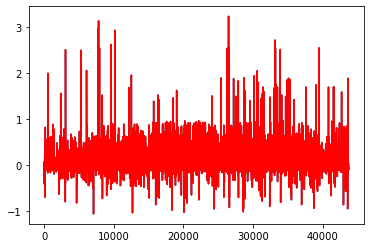

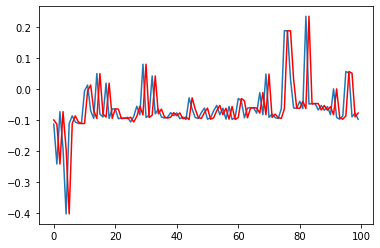

In [152]:
series = normal['ORIGINAL GROSS AMT']

X = series.values
window = 1
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = np.mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()
# zoom plot
plt.plot(test[0:100])
plt.plot(predictions[0:100], color='red')
plt.show()

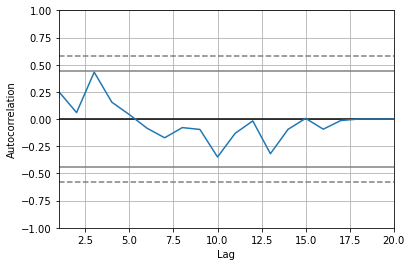

<Figure size 1800x1440 with 0 Axes>

In [128]:
# Forecasting using the ARIMA model

autocorrelation_plot(train_set[0:20])
plt.figure(figsize=(25,20))
plt.show()

In [129]:
arima_model = ARIMA(train_set, order=(2,0,7))
arima_model_fit = arima_model.fit()

In [130]:
print(arima_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:     ORIGINAL GROSS AMT   No. Observations:                30613
Model:                 ARIMA(2, 0, 7)   Log Likelihood               15729.668
Date:                Sun, 31 Jan 2021   AIC                         -31437.337
Time:                        15:41:23   BIC                         -31345.716
Sample:                    06-25-2015   HQIC                        -31407.967
                         - 08-15-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0356      0.002    -19.225      0.000      -0.039      -0.032
ar.L1          0.3135      0.417      0.752      0.452      -0.504       1.131
ar.L2          0.5510      0.375      1.468      0.1

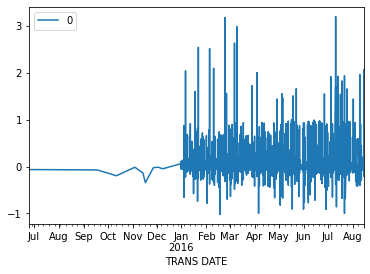

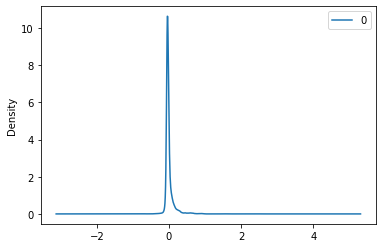

                  0
count  30613.000000
mean       0.000011
std        0.144750
min       -1.018359
25%       -0.050644
50%       -0.033940
75%       -0.000620
max        3.196120


In [131]:
residuals = pd.DataFrame(arima_model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [147]:
history = [x for x in train_set]
predictions = list()
# walk-forward validation
for t in range(len(test_set)):
    model = ARIMA(history, order=(0,1,5))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_set[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test_set, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test_set)
plt.plot(predictions, color='red')
plt.show()

predicted=0.051129, expected=2.009492
predicted=0.168087, expected=-0.042349


KeyboardInterrupt: 